# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [12]:
train = pd.read_csv('train.csv', nrows=700000) 
test = pd.read_csv('test.csv')

Чтобы код работал и ноутбук не умер, пришлось взять трэйн только на 300000 элементов

In [35]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [36]:
test.head()

,title,description,itemid
0,Мастерка,Мастерка фирмы форвард. Белого цвета. В идеаль...,1778449823
1,Зимние сапоги,"Продаю зимние сапоги, в хорошем состоянии, все...",1677656962
2,Видеонаблюдение 8 камер,В комплект Atis AMD-2MIR-8kit входит: /\n1. Ку...,1758182804
3,Запчасти для GLE,Запчасти GLE,1689811299
4,Бластер nerf,Состояние 5+/\nПродаю потому что не нужен/\n18...,1804706240


In [37]:
test.shape

(1411348, 3)

In [45]:
train.shape

(300000, 5)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [13]:
train.isnull().sum().sum()

0

In [39]:
test.isnull().sum().sum()

1

В тестовой выборке есть пропуск, заполним его пустой строкой

In [14]:
test = test.fillna("")

In [41]:
x = test.isnull().sum().sum() + train.isnull().sum().sum()
x

0

Пропусков больше нет

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [16]:
train["text"] = train["title"] + ' ' + train["description"]
test["text"] = test["title"] + ' ' + test["description"]

## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [43]:
print('1. Необходимо предсказать', len(train["Category"].value_counts()), 'классов')

1. Необходимо предсказать 50 классов


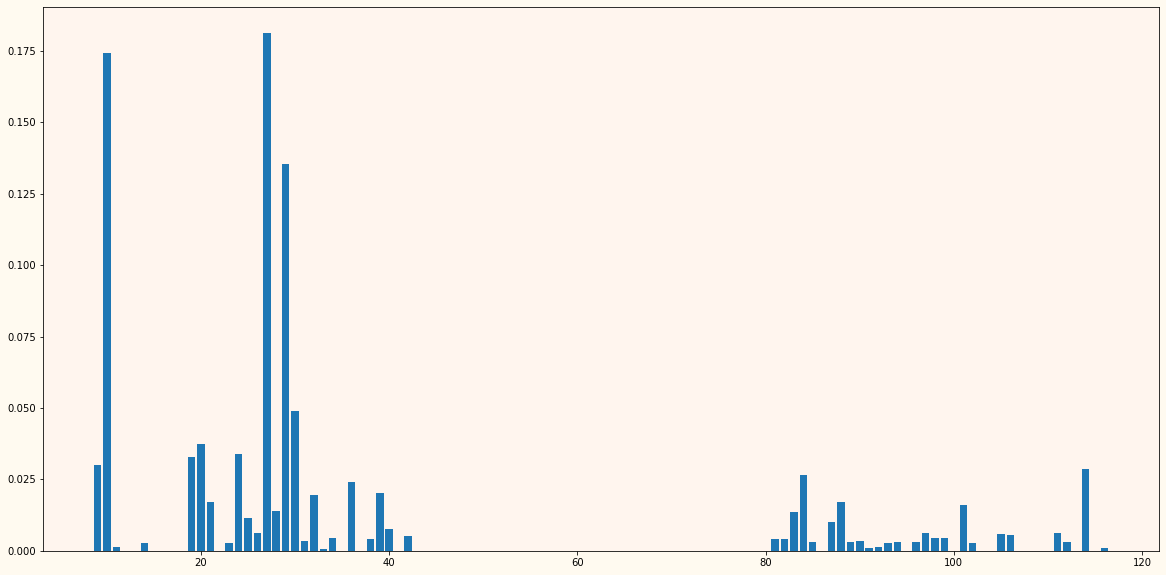

2. Столбчатая диаграма распределения по классам


In [44]:
sum_classes = train["Category"].value_counts().sum()
norm_classes = train["Category"].value_counts() / sum_classes
nc = norm_classes.to_frame()
nc["cats"] = nc.index
nc.rename(columns = {"Category": "Share", "cats": "Categories"}, inplace=True)

x = nc["Categories"]
y = nc["Share"]

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(20)
fig.set_figheight(10)    

plt.show()
print('2. Столбчатая диаграма распределения по классам')
#https://pyprog.pro/mpl/mpl_bar.html

In [46]:
a = nc[nc["Share"] == nc["Share"].max()]
b = nc[nc["Share"] == nc["Share"].min()]
c = pd.concat([a, b])
c.index = ["max share", "min share"]
print('3. Категории с максимальной и минимальной долей')
print(c)
print('Разброс очень большой. Это можно заметить и по графику, и по сравнению категорий с максимальной и минимальной долей')

3. Категории с максимальной и минимальной долей
              Share  Categories
max share  0.181200          27
min share  0.000027          86
Разброс очень большой. Это можно заметить и по графику, и по сравнению категорий с максимальной и минимальной долей


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [47]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train["text"])

print("Размерность матрицы", X.shape)

Размерность матрицы (300000, 438040)


## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [48]:
import unicodedata

voc = cnt_vec.get_feature_names()

n_numb = 0
n_punkt = 0

l_numb = []
l_punkt = []

numb = ['0','1','2', '3', '4', '5', '6', '7', '8', '9']

for i in voc:
    if unicodedata.category(i[0]).startswith("P"):
        l_punkt.append(i)
        n_punkt += 1
    if i[0] in numb:
        l_numb.append(i)
        n_numb += 1

print('Число слов начинающихся на цифры', n_numb, 'Число слов начинающихся на знаки пунктуации', n_punkt)

Число слов начинающихся на цифры 80083 Число слов начинающихся на знаки пунктуации 308


## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [49]:
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
nltk.download("stopwords")
import string
import sys
from unicodedata import category
codepoints = range(sys.maxunicode + 1)
punctuation = {c for i in codepoints if category(c := chr(i)).startswith("P")}
#https://qastack.ru/programming/60983836/complete-set-of-punctuation-marks-for-python-not-just-ascii

def my_tokenizer(s):
    tokens = nltk.word_tokenize(s.lower())
    numbs = {'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}
    stops = stopwords.words('russian')
    punkts = punctuation
    tokens1=[]
    for i in tokens:
        if set(i)&numbs == set() and set(i)&punkts==set() and i not in stops:
            tokens1.append(i)
    stemmer = SnowballStemmer('russian')
    stemmed = [stemmer.stem(w) for w in tokens1]
    return stemmed

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ilysh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
print(my_tokenizer(train[0:1]["text"][0]))

['эб', 'renault', 'nissan', 'dci', 'delphi', 'год', 'комплект', 'эб', 'мозг', 'компьютер', 'мотор', 'двигател', 'коммутатор', 'электрон', 'блок', 'управлен', 'двигател', 'компьютер', 'мотор', 'рен', 'kangoo', 'канг', 'канг', 'мега', 'сценик', 'laguna', 'лагун', 'clio', 'кли', 'nissan', 'micra', 'нисса', 'микр', 'друг', 'рен', 'нисса', 'дизел', 'топливн', 'аппаратур', 'делф', 'оригина', 'отличн', 'состоян', 'проверен', 'гарант', 'запчаст', 'предоставля', 'гарант', 'возможн', 'установк', 'подробн', 'раздел', 'компан', 'дорож', 'сво', 'репутац', 'торгу', 'легальн', 'контрактн', 'запчаст', 'дета', 'налич', 'таможен', 'документ', 'запчаст', 'автомобил', 'пробег', 'росс', 'отправля', 'друг', 'регион', 'таможен', 'союз', 'транспортн', 'компан', 'наложн', 'платеж']


## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [51]:
df = train.sample(100000, random_state=1)

In [52]:
vect = CountVectorizer(analyzer='word', tokenizer=my_tokenizer)
X2 = vect.fit_transform(df["text"])
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [53]:
X2.shape

(100000, 92456)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, df["Category"], test_size = 0.2)

In [55]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score


clf = linear_model.SGDClassifier()
clf.fit(X_train, y_train)

print('accuracy:', accuracy_score(y_test, clf.predict(X_test)))

accuracy: 0.8369


## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(analyzer='word', tokenizer=my_tokenizer)
X3 = tfidf_vec.fit_transform(df["text"])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X3, df["Category"], test_size = 0.2)

In [65]:
clf = linear_model.SGDClassifier()
clf.fit(X_train, y_train)

print('size:', X3.shape, 'accuracy:', accuracy_score(y_test, clf.predict(X_test)))

size: (100000, 92456) accuracy: 0.8294


In [68]:
tfidf_vec = TfidfVectorizer(analyzer='word', tokenizer=my_tokenizer, max_df=0.9)
X4 = tfidf_vec.fit_transform(df["text"])

KeyboardInterrupt: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X4, df["Category"], test_size = 0.2)

In [ ]:
clf = linear_model.SGDClassifier()
clf.fit(X_train, y_train)

print('size:', X4.shape, 'accuracy:', accuracy_score(y_test, clf.predict(X_test)))

Качество модели немного выросло, но размер матрицы не изменился, что странно. Он меняется только при очень маленьком максимальном дф, возможно это связано с особенностями датасета - запросы обычно очень короткие, поэтому и слова получаются короткие

## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

hash_vec = HashingVectorizer(analyzer='word', tokenizer=my_tokenizer, n_features=30000)
X5 = hash_vec.fit_transform(df["text"])

X_train, X_test, y_train, y_test = train_test_split(X5, df["Category"], test_size = 0.2)

clf = linear_model.SGDClassifier()
clf.fit(X_train, y_train)

print('size:', X5.shape, 'accuracy:', accuracy_score(y_test, clf.predict(X_test)))

Лучшая модель - Тфид векторайзер, причем при любом максимальном дф качество модели наивысшее, но размер матрицы тоже очень большой - лучшая модель занимает много памяти. Мой векторвйзер тоже неплох - немного отстает от Тфиди опережает хэшинг векторайзер, который занял последнее место по качеству, но лучший по памяти - у него самая маленькая матрица

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from sklearn.metrics import accuracy_score

tfidf_vec = TfidfVectorizer(max_df=0.8)
X5 = tfidf_vec.fit_transform(train["text"])


clf = linear_model.SGDClassifier()
clf.fit(X5, train["Category"])


SGDClassifier()

In [20]:
X6 = tfidf_vec.transform(test["text"])
pred = clf.predict(X6)

d = {'Id': test["itemid"], 'Category': pred}

df_ans = pd.DataFrame(d)

df_ans.set_index('Id', inplace=True)
df_ans.to_csv('answer1.csv')